In [18]:
from importlib import reload
from scipy.optimize import curve_fit
import data_processing as dp
import numpy as np
import matplotlib.pyplot as plt
dp = reload(dp)

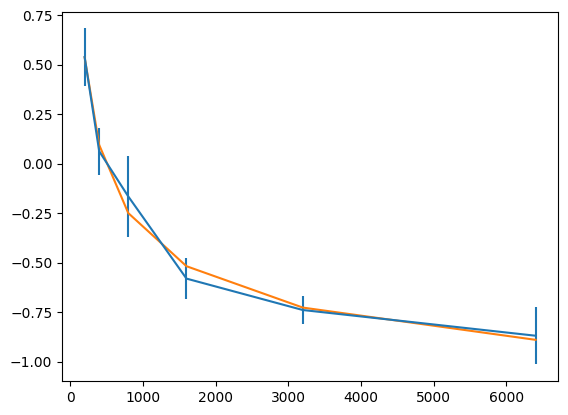

[-1.4629145  13.49011037  0.3601655 ]
[0.36023445 5.98018979 0.11332557]


In [27]:
df = dp.read_data_frame("vertex_degree_max_sus")
df_peak = dp.get_peak_data(df, 1000)
dp.write_data_frame(df_peak, "peak_data")

def kappa_curve(N, kappa_c, c, nu):
    return kappa_c + c * np.power(N, -nu)

popt, pcov = curve_fit(kappa_curve, df_peak["volume"], df_peak["kappa"], bounds=([-np.inf, 0, 0], [np.inf, np.inf, np.inf]))
fit_values = popt
fit_errors = np.sqrt(np.diag(pcov))

plt.errorbar(df_peak["volume"], df_peak["kappa"], yerr=df_peak["kappa_error"])
plt.plot(df_peak["volume"], kappa_curve(df_peak["volume"], *popt))
plt.show()

print(fit_values)
print(fit_errors)